In [1]:
# 괌 날씨 데이터 분석 - Part 1: CSV 데이터 분석

이 노트북에서는 2020년부터 2022년까지의 괌 날씨 CSV 데이터를 분석하고 시각화합니다.

## 목차
1. 데이터 로딩 및 탐색
2. 데이터 전처리
3. 연도별/월별 분석
4. 시각화
5. 인사이트 도출


SyntaxError: invalid syntax (1549381718.py, line 3)

In [2]:
# 필요한 라이브러리 import
import sys
import os
sys.path.append('../src')  # src 디렉토리를 Python 경로에 추가

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 우리가 만든 모듈들 import
from data_processing import load_all_csv_files, preprocess_weather_data, get_yearly_summary, get_monthly_summary
from visualization import plot_monthly_temperature_by_year, plot_monthly_precipitation_by_year, plot_yearly_summary, plot_temperature_departure, create_comprehensive_dashboard

# 한글 폰트 설정 (macOS)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 import 완료!")


라이브러리 import 완료!


In [3]:
## 1. 데이터 로딩 및 탐색


In [4]:
# 1.1 CSV 파일들 로딩
combined_df, csv_files = load_all_csv_files("../data")

print(f"총 {len(csv_files)}개의 CSV 파일을 로딩했습니다.")
print(f"결합된 데이터프레임 크기: {combined_df.shape}")
print("\n파일 목록:")
for i, file in enumerate(csv_files, 1):
    print(f"{i:2d}. {file}")

print(f"\n데이터 기간: {combined_df['Date'].min()} ~ {combined_df['Date'].max()}")
print(f"총 {len(combined_df)} 일의 데이터")


총 36개의 CSV 파일을 로딩했습니다.
결합된 데이터프레임 크기: (1096, 10)

파일 목록:
 1. 2020_01.csv
 2. 2020_02.csv
 3. 2020_03.csv
 4. 2020_04.csv
 5. 2020_05.csv
 6. 2020_06.csv
 7. 2020_07.csv
 8. 2020_08.csv
 9. 2020_09.csv
10. 2020_10.csv
11. 2020_11.csv
12. 2020_12.csv
13. 2021_01.csv
14. 2021_02.csv
15. 2021_03.csv
16. 2021_04.csv
17. 2021_05.csv
18. 2021_06.csv
19. 2021_07.csv
20. 2021_08.csv
21. 2021_09.csv
22. 2021_10.csv
23. 2021_11.csv
24. 2021_12.csv
25. 2022_01.csv
26. 2022_02.csv
27. 2022_03.csv
28. 2022_04.csv
29. 2022_05.csv
30. 2022_06.csv
31. 2022_07.csv
32. 2022_08.csv
33. 2022_09.csv
34. 2022_10.csv
35. 2022_11.csv
36. 2022_12.csv

데이터 기간: 2020-01-01 ~ 2022-12-31
총 1096 일의 데이터


In [5]:
# 1.2 데이터 구조 탐색
print("=== 데이터 기본 정보 ===")
combined_df.info()

print("\n=== 첫 5행 데이터 ===")
print(combined_df.head())

print("\n=== 기본 통계 ===")
print(combined_df.describe())


=== 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1096 non-null   object 
 1   Maximum        1096 non-null   int64  
 2   Minimum        1096 non-null   int64  
 3   Average        1096 non-null   float64
 4   Departure      1096 non-null   float64
 5   HDD            1096 non-null   int64  
 6   CDD            1096 non-null   int64  
 7   Precipitation  1096 non-null   object 
 8   New Snow       1096 non-null   int64  
 9   Snow Depth     1096 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 85.8+ KB

=== 첫 5행 데이터 ===
         Date  Maximum  Minimum  Average  Departure  HDD  CDD Precipitation  \
0  2020-01-01       86       76     80.5       -0.6    0   16             T   
1  2020-01-02       85       76     80.5       -0.6    0   16          0.03   
2  2020-01-03       86       

In [7]:
# 1.3 특수 값들 확인
print("=== Precipitation 컬럼의 고유값 ===")
print(f"고유값: {sorted(combined_df['Precipitation'].unique())}")
print(f"'T' 값의 개수: {sum(combined_df['Precipitation'] == 'T')}")

print("\n=== Snow Depth 컬럼의 고유값 ===")
print(f"고유값: {sorted(combined_df['Snow Depth'].unique())}")
print(f"'M' 값의 개수: {sum(combined_df['Snow Depth'] == 'M')}")

print("\n참고:")
print("- 'T' (Trace): 강수량이 측정 가능한 최소량보다 적음을 의미")
print("- 'M' (Missing): 결측값을 의미")


=== Precipitation 컬럼의 고유값 ===


TypeError: '<' not supported between instances of 'float' and 'str'

In [8]:
## 2. 데이터 전처리

데이터를 분석하기 전에 다음 전처리 작업을 수행합니다:
1. Date 컬럼을 datetime 타입으로 변환
2. Year, Month, Day 컬럼 추가
3. Precipitation의 'T' → 0 변환
4. Snow Depth의 'M' → 0 변환
5. 화씨 → 섭씨 변환 (Maximum, Minimum, Average)
6. 인치 → mm 변환 (Precipitation, Snow Depth)


SyntaxError: invalid character '→' (U+2192) (3660161128.py, line 6)

In [14]:
# 2.1 데이터 전처리 실행
print("데이터 전처리 중...")
processed_df = preprocess_weather_data(combined_df)

print("전처리 완료!")
print(f"전처리 후 데이터 크기: {processed_df.shape}")

print("\n=== 전처리 후 데이터 타입 ===")
processed_df.info()

print("\n=== 전처리 후 첫 5행 ===")
print(processed_df.head())


데이터 전처리 중...
전처리 완료!
전처리 후 데이터 크기: (1096, 13)

=== 전처리 후 데이터 타입 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1096 non-null   datetime64[ns]
 1   Maximum        1096 non-null   float64       
 2   Minimum        1096 non-null   float64       
 3   Average        1096 non-null   float64       
 4   Departure      1096 non-null   float64       
 5   HDD            1096 non-null   int64         
 6   CDD            1096 non-null   int64         
 7   Precipitation  1096 non-null   float64       
 8   New Snow       1096 non-null   int64         
 9   Snow Depth     1096 non-null   float64       
 10  Year           1096 non-null   int32         
 11  Month          1096 non-null   int32         
 12  Day            1096 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(3), int64(3)
me

In [15]:
# 2.2 전처리 결과 확인
print("=== 기온 변환 결과 (화씨 → 섭씨) ===")
print("샘플 데이터 (첫 5행):")
print(processed_df[['Date', 'Maximum', 'Minimum', 'Average']].head())

print(f"\n평균 기온 범위: {processed_df['Average'].min():.1f}°C ~ {processed_df['Average'].max():.1f}°C")
print(f"최고 기온 범위: {processed_df['Maximum'].min():.1f}°C ~ {processed_df['Maximum'].max():.1f}°C")
print(f"최저 기온 범위: {processed_df['Minimum'].min():.1f}°C ~ {processed_df['Minimum'].max():.1f}°C")

print("\n=== 강수량 변환 결과 (인치 → mm) ===")
print(f"강수량 범위: {processed_df['Precipitation'].min():.1f}mm ~ {processed_df['Precipitation'].max():.1f}mm")
print(f"평균 일일 강수량: {processed_df['Precipitation'].mean():.2f}mm")

# 전처리된 데이터를 CSV로 저장
processed_df.to_csv("../results/processed_weather_data.csv", index=False)
print("\n전처리된 데이터를 'results/processed_weather_data.csv'에 저장했습니다.")


=== 기온 변환 결과 (화씨 → 섭씨) ===
샘플 데이터 (첫 5행):
        Date    Maximum    Minimum    Average
0 2020-01-01  30.000000  24.444444  26.944444
1 2020-01-02  29.444444  24.444444  26.944444
2 2020-01-03  30.000000  23.888889  26.944444
3 2020-01-04  30.000000  23.888889  26.944444
4 2020-01-05  31.111111  23.888889  27.500000

평균 기온 범위: 24.2°C ~ 30.3°C
최고 기온 범위: 16.7°C ~ 33.3°C
최저 기온 범위: 21.1°C ~ 27.8°C

=== 강수량 변환 결과 (인치 → mm) ===
강수량 범위: 0.0mm ~ 117.6mm
평균 일일 강수량: 6.44mm

전처리된 데이터를 'results/processed_weather_data.csv'에 저장했습니다.


In [16]:
## 3. 연도별/월별 분석


In [17]:
# 3.1 연도별 요약 통계
yearly_summary = get_yearly_summary(processed_df)
print("=== 연도별 요약 통계 ===")
print(yearly_summary.round(2))

print("\n=== 연도별 특징 ===")
for _, row in yearly_summary.iterrows():
    year = int(row['Year'])
    avg_temp = row['Average']
    total_precip = row['Precipitation']
    departure = row['Departure']
    
    print(f"\n{year}년:")
    print(f"  • 평균 기온: {avg_temp:.1f}°C")
    print(f"  • 총 강수량: {total_precip:.0f}mm")
    print(f"  • 평년 대비: {departure:+.1f}°C ({'평년보다 높음' if departure > 0 else '평년보다 낮음' if departure < 0 else '평년과 비슷'})")


=== 연도별 요약 통계 ===
   Year  Average  Maximum  Minimum  Precipitation  Departure
0  2020    28.01    30.89    25.13        2266.70       0.42
1  2021    27.78    29.71    24.95        2505.71      -0.01
2  2022    27.35    30.20    24.49        2286.00      -0.76

=== 연도별 특징 ===

2020년:
  • 평균 기온: 28.0°C
  • 총 강수량: 2267mm
  • 평년 대비: +0.4°C (평년보다 높음)

2021년:
  • 평균 기온: 27.8°C
  • 총 강수량: 2506mm
  • 평년 대비: -0.0°C (평년보다 낮음)

2022년:
  • 평균 기온: 27.3°C
  • 총 강수량: 2286mm
  • 평년 대비: -0.8°C (평년보다 낮음)


In [18]:
# 3.2 월별 분석 (전체 기간 통합)
monthly_overall = processed_df.groupby('Month').agg({
    'Average': 'mean',
    'Maximum': 'mean',
    'Minimum': 'mean',
    'Precipitation': 'mean',
    'Departure': 'mean'
}).round(2)

print("=== 월별 평균 (2020-2022년 통합) ===")
print(monthly_overall)

# 가장 덥고 추운 달 찾기
hottest_month = monthly_overall['Average'].idxmax()
coldest_month = monthly_overall['Average'].idxmin()
wettest_month = monthly_overall['Precipitation'].idxmax()
driest_month = monthly_overall['Precipitation'].idxmin()

month_names = ['', '1월', '2월', '3월', '4월', '5월', '6월', 
               '7월', '8월', '9월', '10월', '11월', '12월']

print(f"\n=== 극값 분석 ===")
print(f"가장 더운 달: {month_names[hottest_month]} ({monthly_overall.loc[hottest_month, 'Average']:.1f}°C)")
print(f"가장 추운 달: {month_names[coldest_month]} ({monthly_overall.loc[coldest_month, 'Average']:.1f}°C)")
print(f"가장 비가 많은 달: {month_names[wettest_month]} ({monthly_overall.loc[wettest_month, 'Precipitation']:.1f}mm)")
print(f"가장 건조한 달: {month_names[driest_month]} ({monthly_overall.loc[driest_month, 'Precipitation']:.1f}mm)")


=== 월별 평균 (2020-2022년 통합) ===
       Average  Maximum  Minimum  Precipitation  Departure
Month                                                     
1        26.87    29.75    24.02           3.54      -0.30
2        27.09    29.97    24.22           1.79       0.25
3        27.65    30.71    24.57           1.70       0.54
4        28.02    31.00    25.03           3.17      -0.04
5        28.30    31.05    25.55           4.82      -0.26
6        28.60    31.53    25.69           3.77       0.05
7        28.20    31.02    25.36           8.39       0.25
8        27.69    30.57    24.80          10.18      -0.02
9        27.82    30.70    24.94           9.65       0.32
10       27.16    29.99    24.33          16.54      -1.20
11       27.79    26.86    25.01           7.33      -0.42
12       27.36    29.99    24.73           5.94      -0.57

=== 극값 분석 ===
가장 더운 달: 6월 (28.6°C)
가장 추운 달: 1월 (26.9°C)
가장 비가 많은 달: 10월 (16.5mm)
가장 건조한 달: 3월 (1.7mm)


In [19]:
## 4. 데이터 시각화

다양한 그래프를 통해 괌의 날씨 패턴을 시각적으로 분석합니다.


SyntaxError: invalid syntax (1952036969.py, line 3)

연도별 월평균 기온 그래프를 생성 중...


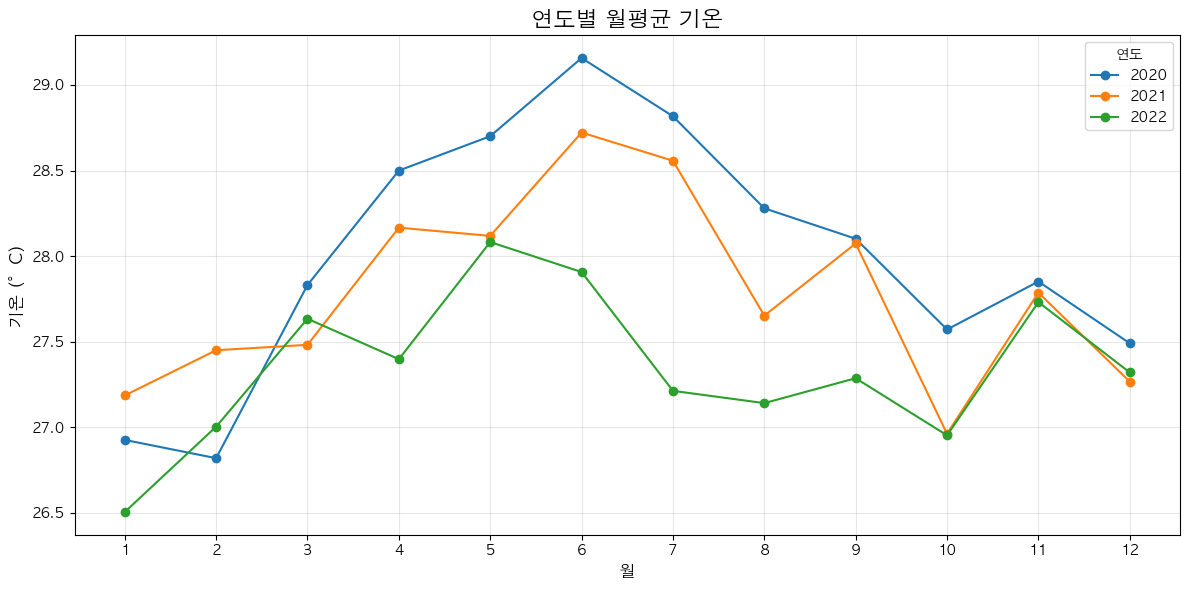

In [20]:
# 4.1 연도별 월평균 기온 그래프
print("연도별 월평균 기온 그래프를 생성 중...")
plot_monthly_temperature_by_year(processed_df, save_path="../results/monthly_temperature_by_year.png")


연도별 월평균 강수량 그래프를 생성 중...


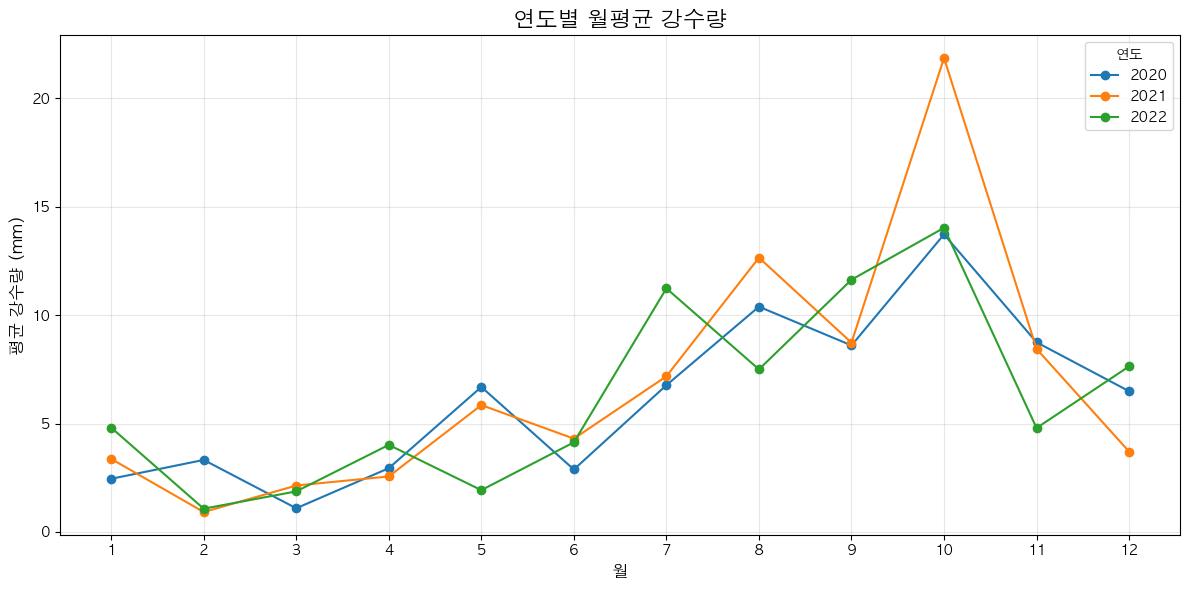

In [21]:
# 4.2 연도별 월평균 강수량 그래프
print("연도별 월평균 강수량 그래프를 생성 중...")
plot_monthly_precipitation_by_year(processed_df, save_path="../results/monthly_precipitation_by_year.png")


연간 요약 그래프를 생성 중...


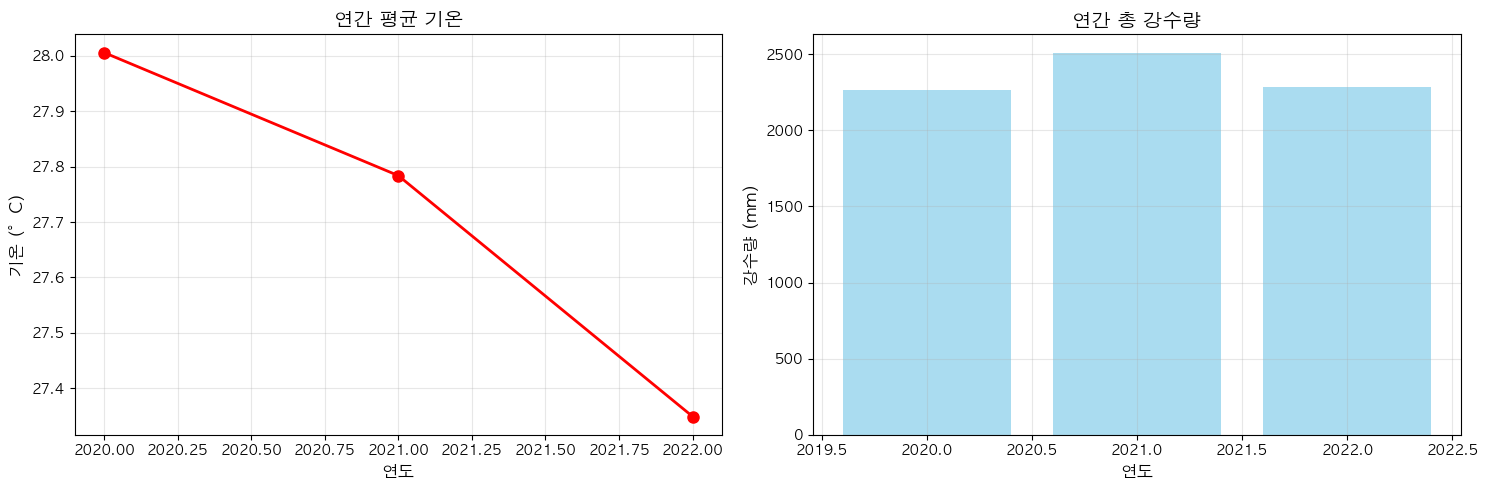

In [22]:
# 4.3 연간 요약 그래프 (평균 기온 & 총 강수량)
print("연간 요약 그래프를 생성 중...")
plot_yearly_summary(processed_df, save_path="../results/yearly_summary.png")


월별 기온 편차 그래프를 생성 중...


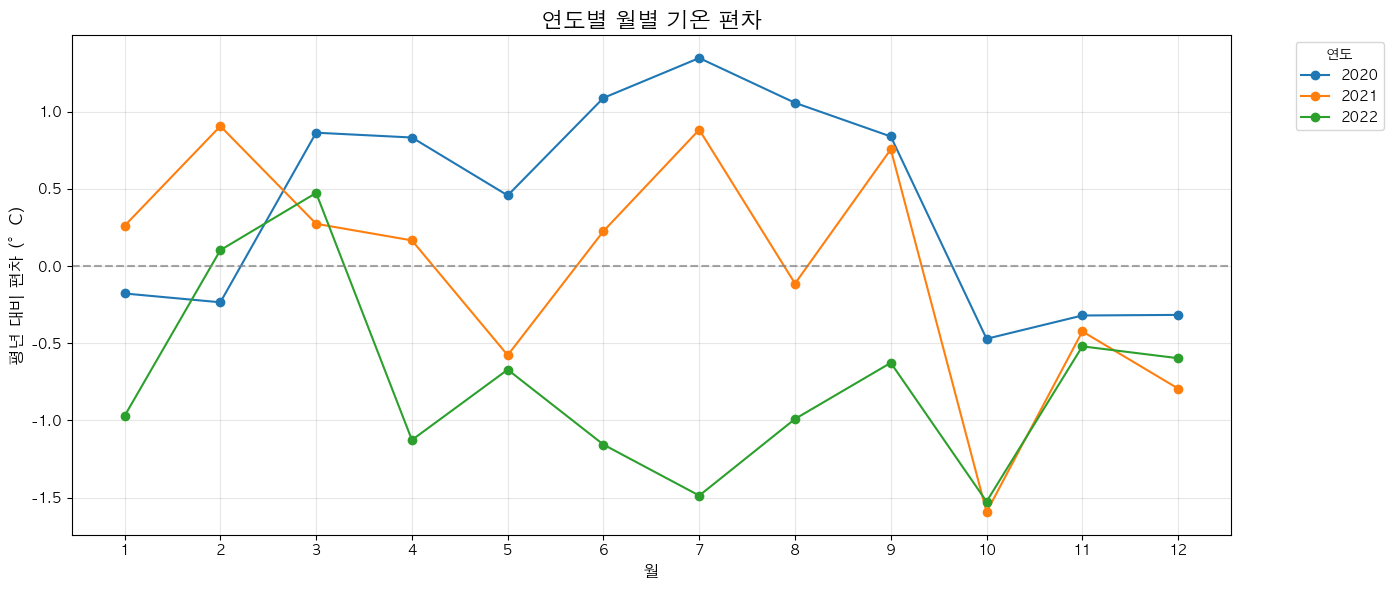

In [23]:
# 4.4 월별 기온 편차 그래프
print("월별 기온 편차 그래프를 생성 중...")
plot_temperature_departure(processed_df, save_path="../results/temperature_departure.png")


종합 대시보드를 생성 중...


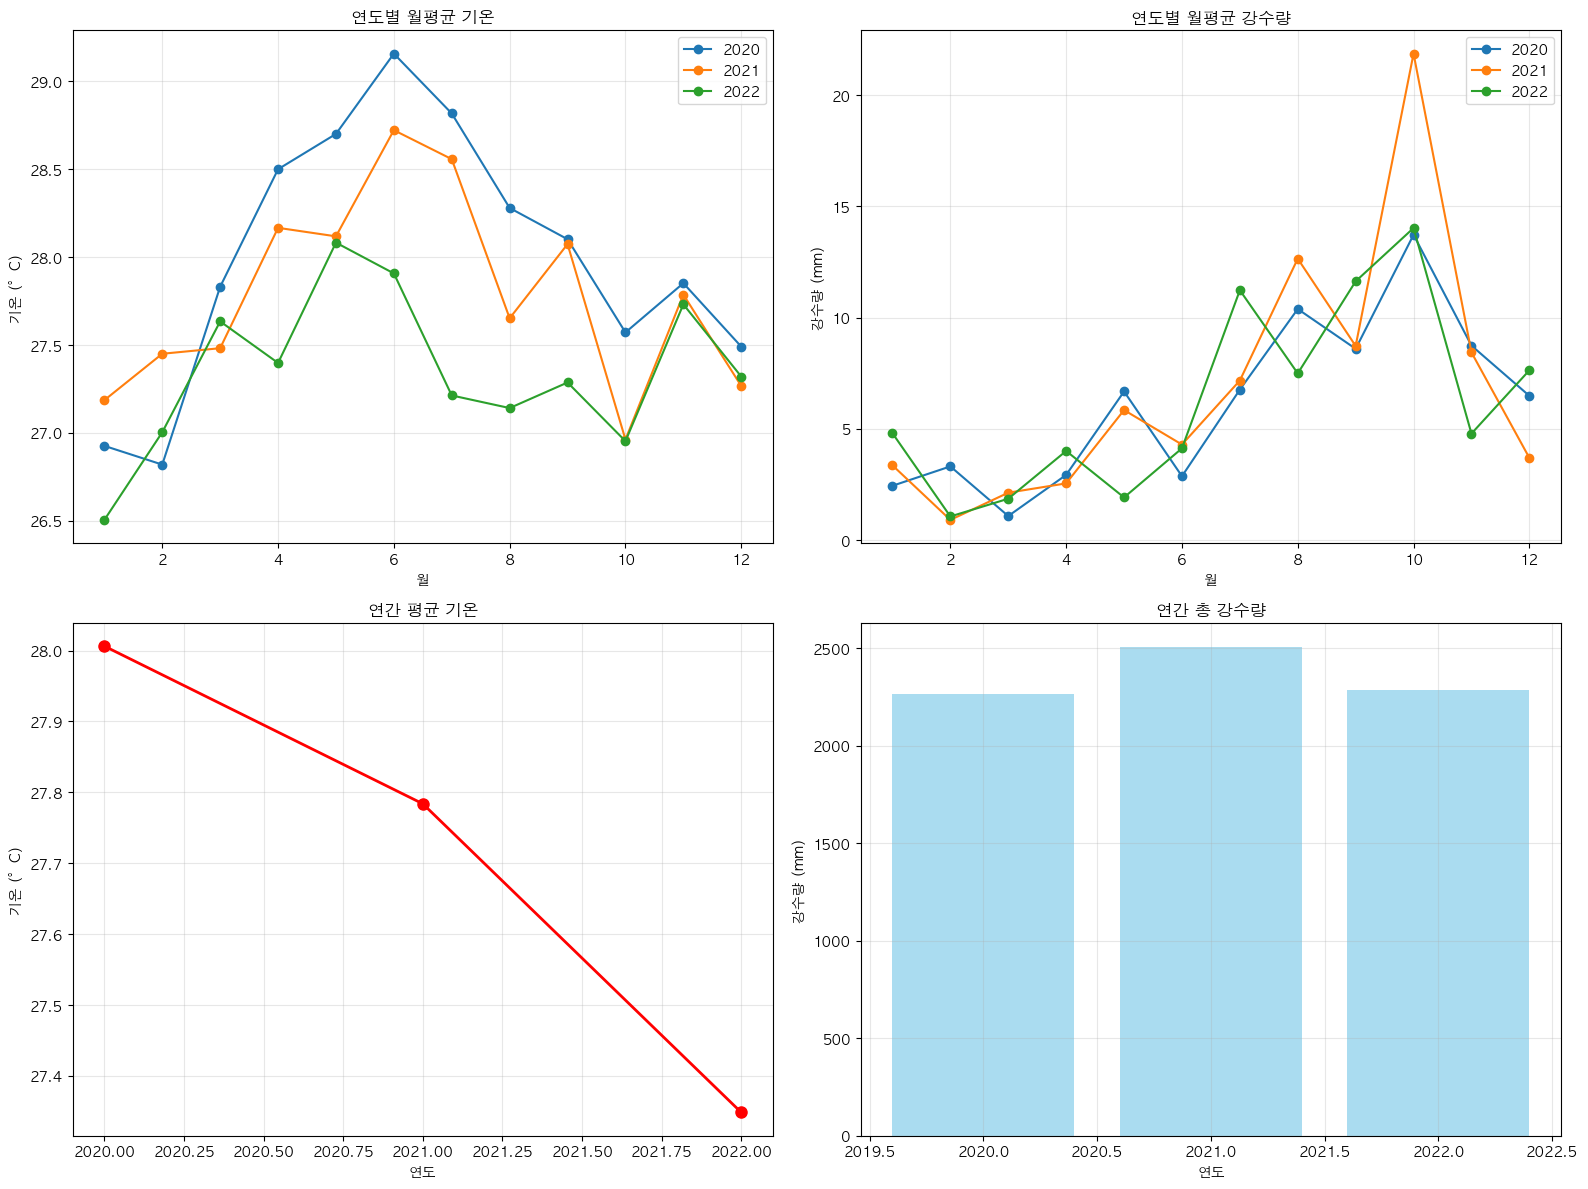

In [25]:
# 4.5 종합 대시보드
print("종합 대시보드를 생성 중...")
create_comprehensive_dashboard(processed_df, save_path="../results/comprehensive_dashboard.png")


In [26]:
## 5. 인사이트 및 결론


In [27]:
# 5.1 주요 인사이트 분석
print("=== 괌 날씨 데이터 분석 결과 (2020-2022) ===\n")

# 기온 안정성 분석
temp_std = processed_df.groupby('Year')['Average'].std()
print("🌡️ 기온의 안정성:")
print(f"   연도별 일평균 기온의 표준편차: {temp_std.mean():.2f}°C")
print(f"   → 괌은 연중 매우 안정적인 기온을 유지 (열대 해양성 기후 특성)")

# 계절성 분석  
summer_months = [6, 7, 8, 9]  # 여름철 (우기)
winter_months = [12, 1, 2, 3]  # 건기

summer_avg = processed_df[processed_df['Month'].isin(summer_months)]['Average'].mean()
winter_avg = processed_df[processed_df['Month'].isin(winter_months)]['Average'].mean()
temp_diff = summer_avg - winter_avg

print(f"\n🌴 계절별 특성:")
print(f"   여름철(6-9월) 평균 기온: {summer_avg:.1f}°C")
print(f"   건기(12-3월) 평균 기온: {winter_avg:.1f}°C") 
print(f"   계절간 기온 차이: {temp_diff:.1f}°C (매우 작음)")

# 강수량 변동성 분석
annual_precip = processed_df.groupby('Year')['Precipitation'].sum()
precip_variation = annual_precip.std() / annual_precip.mean() * 100

print(f"\n🌧️ 강수량 특성:")
print(f"   연간 총 강수량 평균: {annual_precip.mean():.0f}mm")
print(f"   연간 강수량 변동계수: {precip_variation:.1f}%")
if precip_variation < 20:
    print(f"   → 상대적으로 안정적인 강수 패턴")
else:
    print(f"   → 연도별 강수량 변동이 큼")

# 극값 분석
extreme_hot = processed_df[processed_df['Maximum'] > processed_df['Maximum'].quantile(0.95)]
extreme_cold = processed_df[processed_df['Minimum'] < processed_df['Minimum'].quantile(0.05)]

print(f"\n🔥 극값 분석:")
print(f"   최고 기온 기록: {processed_df['Maximum'].max():.1f}°C")
print(f"   최저 기온 기록: {processed_df['Minimum'].min():.1f}°C")
print(f"   일교차 평균: {(processed_df['Maximum'] - processed_df['Minimum']).mean():.1f}°C")

# 기후 변화 신호
departure_trend = processed_df.groupby('Year')['Departure'].mean()
print(f"\n📈 기후 변화 신호:")
for year, dept in departure_trend.items():
    trend = "상승" if dept > 0 else "하락" if dept < 0 else "평년 수준"
    print(f"   {year}년 평년 대비: {dept:+.2f}°C ({trend})")

if departure_trend.iloc[-1] > departure_trend.iloc[0]:
    print("   → 최근 평년 대비 기온 상승 경향")
else:
    print("   → 최근 평년 대비 기온 하락 또는 안정")


=== 괌 날씨 데이터 분석 결과 (2020-2022) ===

🌡️ 기온의 안정성:
   연도별 일평균 기온의 표준편차: 0.91°C
   → 괌은 연중 매우 안정적인 기온을 유지 (열대 해양성 기후 특성)

🌴 계절별 특성:
   여름철(6-9월) 평균 기온: 28.1°C
   건기(12-3월) 평균 기온: 27.2°C
   계절간 기온 차이: 0.8°C (매우 작음)

🌧️ 강수량 특성:
   연간 총 강수량 평균: 2353mm
   연간 강수량 변동계수: 5.6%
   → 상대적으로 안정적인 강수 패턴

🔥 극값 분석:
   최고 기온 기록: 33.3°C
   최저 기온 기록: 21.1°C
   일교차 평균: 5.4°C

📈 기후 변화 신호:
   2020년 평년 대비: +0.42°C (상승)
   2021년 평년 대비: -0.01°C (하락)
   2022년 평년 대비: -0.76°C (하락)
   → 최근 평년 대비 기온 하락 또는 안정
